# Validation of Different Model
![WorkFlow](./Val.jpg) 

## Step 1 import shapefile and Plot
In this step, we load shapefiles and visualize the results of different spatial analyses (MGWR, OLS, Space-Time Cube, and Suitability Analysis) using Python's `geopandas` and `matplotlib` libraries.

### Step 1.1  **Import Required Libraries**:
   - We use `geopandas` to handle spatial data in the form of shapefiles.
   - `matplotlib` is utilized to create the plots and visualize the spatial data.

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

### Step 1.2 **Load Shapefiles**:
Four shapefiles are loaded, each representing the results from different spatial models:
  - **MGWR** results: Multiscale Geographically Weighted Regression analysis, which shows how convenience store density varies across space.
  - **OLS** results: Ordinary Least Squares regression for estimating and predicting convenience store locations.
  - **Space-Time Cube** results: Represents the predicted spatial and temporal distribution of convenience stores.
  - **Suitability Analysis** results: Shows the areas deemed most suitable for store placement based on spatial criteria.

In [3]:
# Read the shapefile
shapefile1_path = 'Results/MGWR/MGWR.shp'
shapefile2_path = 'Results/OLS/OLS.shp'
shapefile3_path = 'Results/SpaceTimeCube/SpaceTimeCube.shp'
shapefile4_path = 'Results/Suitability/Suitability.shp'
# Read the shapefile
gdf1 = gpd.read_file(shapefile1_path)
gdf2 = gpd.read_file(shapefile2_path)
gdf3 = gpd.read_file(shapefile3_path)
gdf4 = gpd.read_file(shapefile4_path)

In [4]:
#Print gdf head
print(gdf1.head())
print(gdf2.head())
print(gdf3.head())
print(gdf4.head())

   SOURCE_ID  S_CONVENIE    S_BUSC  S_METROC   S_BIKEC   S_ROADC  S_POPDENC  \
0          1   -0.480210  0.461398  0.367606  0.441868  1.521353   1.754126   
1          2    2.152653  1.603125  2.176768  2.390381  1.521353   1.754126   
2          3   -0.480210 -0.109465  0.367606 -0.532388 -0.144764   0.525917   
3          4   -0.480210 -0.109465 -0.838502 -0.532388 -0.144764  -0.702292   
4          5   -0.480210 -0.680328 -0.838502 -0.532388 -0.700136  -0.702292   

   S_C_INTRCP  S_SE_INTRC  S_T_INTRCP  ...   C_ROADC  C_POPDENC  S_RESIDUAL  \
0   -0.216253    0.093484   -2.313255  ...  0.036966   0.014199   -1.159479   
1   -0.047147    0.070575   -0.668046  ...  0.050496   0.014240    0.676910   
2   -0.138345    0.072785   -1.900727  ...  0.048746   0.014227   -0.241698   
3   -0.167584    0.090756   -1.846545  ...  0.015977   0.014226   -0.041141   
4   -0.173661    0.084100   -2.064944  ...  0.016313   0.014222    0.000785   

   S_STDRESID  INFLUENCE       COOKS_D  CND_NUMBER

### Step 1.3 **Create Subplots**:
- A 2x2 grid is created using `matplotlib` to visualize the four analyses.
- Relevant shapefile columns are plotted with a legend explaining the colors.
- Each subplot is titled based on the analysis:
   - MGWR – Store Density
   - OLS – Estimated Values
   - Space-Time Cube – Prediction Score
   - Suitability – Score


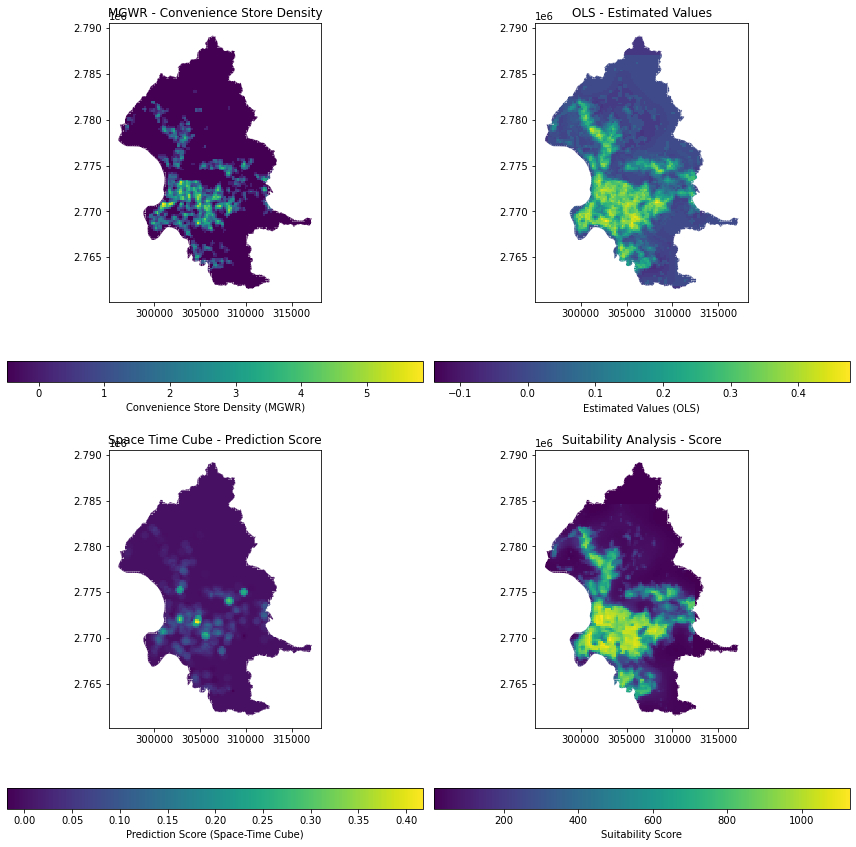

In [5]:
# Create a figure with subplots (2x2 grid)
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Plot each shapefile on a separate subplot with appropriate columns
gdf1.plot(ax=axs[0, 0], column='S_CONVENIE', legend=True, 
          legend_kwds={'label': "Convenience Store Density (MGWR)", 'orientation': "horizontal"})
gdf2.plot(ax=axs[0, 1], column='Estimated', legend=True, 
          legend_kwds={'label': "Estimated Values (OLS)", 'orientation': "horizontal"})
gdf3.plot(ax=axs[1, 0], column='Score', legend=True, 
          legend_kwds={'label': "Prediction Score (Space-Time Cube)", 'orientation': "horizontal"})
gdf4.plot(ax=axs[1, 1], column='score', legend=True, 
          legend_kwds={'label': "Suitability Score", 'orientation': "horizontal"})

# Set titles for each subplot
axs[0, 0].set_title('MGWR - Convenience Store Density')
axs[0, 1].set_title('OLS - Estimated Values')
axs[1, 0].set_title('Space Time Cube - Prediction Score')
axs[1, 1].set_title('Suitability Analysis - Score')

# Show the plots
plt.tight_layout()
plt.show()

## Step 2: Min-Max Normalization

To standardize the data and bring it to a comparable scale, we apply **Min-Max normalization** to each dataset. This ensures that all variables are scaled between 0 and 1, making them easier to compare in the visualizations. Below are the steps taken to normalize the data:

Using `MinMaxScaler` from `sklearn.preprocessing`, we apply the Min-Max scaling to the relevant columns from each dataset:
- For **MGWR**, we normalize the `S_CONVENIE` column.
- For **OLS**, we normalize the `Estimated` column.
- For **Space-Time Cube**, we normalize the `Score` column.
- For **Suitability Analysis**, we normalize the `score` column.

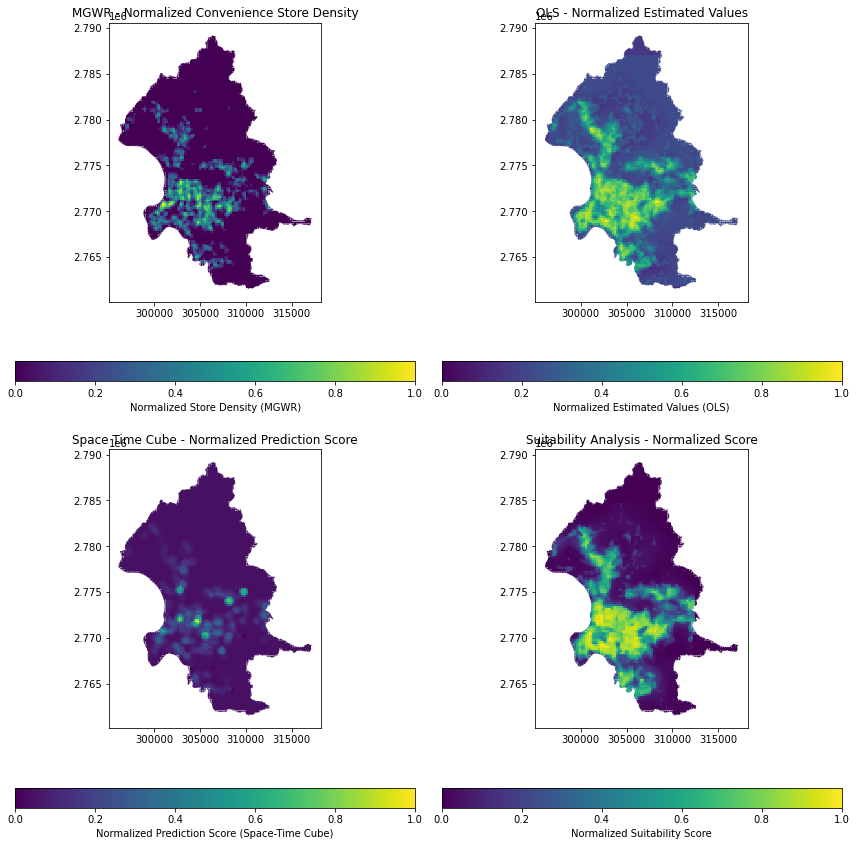

In [6]:
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the relevant columns using Min-Max scaling
gdf1['S_CONVENIE_norm'] = scaler.fit_transform(gdf1[['S_CONVENIE']])
gdf2['Estimated_norm'] = scaler.fit_transform(gdf2[['Estimated']])
gdf3['Score_norm'] = scaler.fit_transform(gdf3[['Score']])
gdf4['score_norm'] = scaler.fit_transform(gdf4[['score']])

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Plot each shapefile with normalized values
gdf1.plot(ax=axs[0, 0], column='S_CONVENIE_norm', legend=True, 
          legend_kwds={'label': "Normalized Store Density (MGWR)", 'orientation': "horizontal"})
gdf2.plot(ax=axs[0, 1], column='Estimated_norm', legend=True, 
          legend_kwds={'label': "Normalized Estimated Values (OLS)", 'orientation': "horizontal"})
gdf3.plot(ax=axs[1, 0], column='Score_norm', legend=True, 
          legend_kwds={'label': "Normalized Prediction Score (Space-Time Cube)", 'orientation': "horizontal"})
gdf4.plot(ax=axs[1, 1], column='score_norm', legend=True, 
          legend_kwds={'label': "Normalized Suitability Score", 'orientation': "horizontal"})

# Set titles for each subplot
axs[0, 0].set_title('MGWR - Normalized Convenience Store Density')
axs[0, 1].set_title('OLS - Normalized Estimated Values')
axs[1, 0].set_title('Space Time Cube - Normalized Prediction Score')
axs[1, 1].set_title('Suitability Analysis - Normalized Score')

# Show the plots
plt.tight_layout()
plt.show()

## Step 3 Compute Residuals
In this step, we compute the residuals for each spatial model. Residuals represent the difference between the predicted values and the actual values (`Y`). The process involves:

In [26]:
# Load the point data (Y values) for validation
val_data_path = 'Val_data/Val_data.shp'
val_gdf = gpd.read_file(val_data_path)
# Read the shapefile paths
shapefile_paths = ['Results/MGWR/MGWR.shp', 'Results/OLS/OLS.shp', 
                   'Results/SpaceTimeCube/SpaceTimeCube.shp', 'Results/Suitability/Suitability.shp']

# Load the shapefiles into GeoDataFrames
gdfs = [gpd.read_file(path) for path in shapefile_paths]

# Check and align CRS for all gdf and val_gdf
for i, gdf in enumerate(gdfs):
    if gdf.crs != val_gdf.crs:
        val_gdf = val_gdf.to_crs(gdf.crs)
        print(f"CRS aligned for val_gdf to match gdf{i+1}.")

# Check if geometries are valid for all gdf and val_gdf
for i, gdf in enumerate(gdfs):
    if not gdf.is_valid.all():
        gdfs[i] = gdf[gdf.is_valid]
        print(f"Invalid geometries removed from gdf{i+1}.")
if not val_gdf.is_valid.all():
    val_gdf = val_gdf[val_gdf.is_valid]
    print("Invalid geometries removed from val_gdf.")

# Unpack the GeoDataFrames back to gdf1, gdf2, gdf3, gdf4
gdf1, gdf2, gdf3, gdf4 = gdfs

CRS aligned for val_gdf to match gdf1.


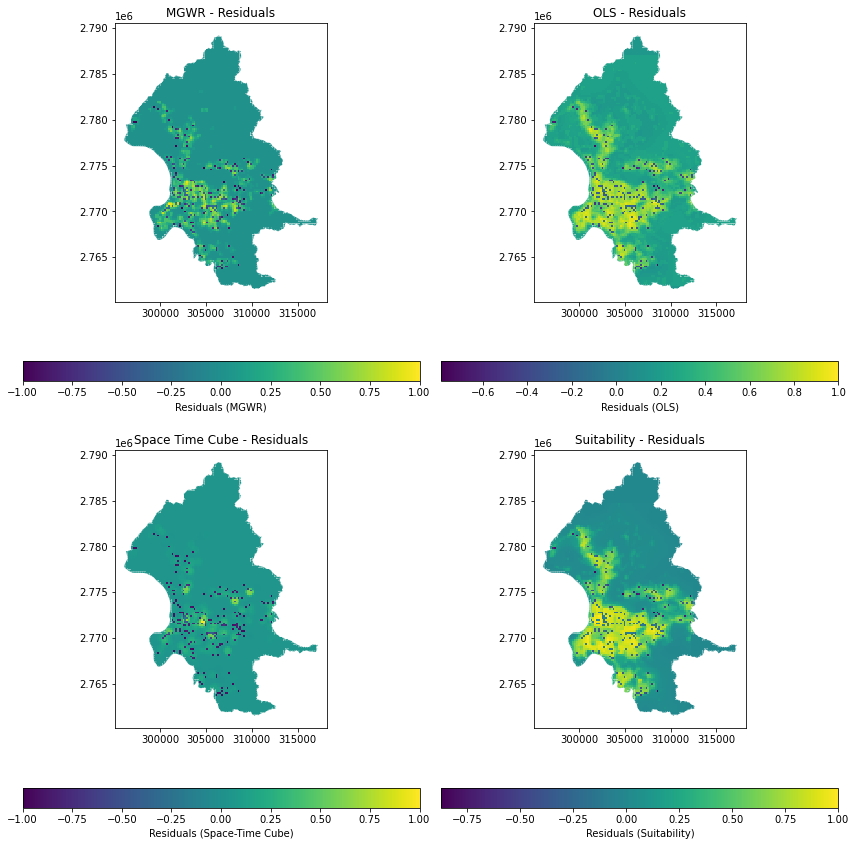

In [29]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the relevant columns using Min-Max scaling
gdf1['S_CONVENIE_norm'] = scaler.fit_transform(gdf1[['S_CONVENIE']])
gdf2['Estimated_norm'] = scaler.fit_transform(gdf2[['Estimated']])
gdf3['Score_norm'] = scaler.fit_transform(gdf3[['Score']])
gdf4['score_norm'] = scaler.fit_transform(gdf4[['score']])
# Perform a spatial join to check if points fall within the features
# This will add Y=1 if a point is inside the feature, otherwise Y=0
gdf1['Y'] = gdf1.geometry.apply(lambda geom: val_gdf.within(geom).any()).astype(int)
gdf2['Y'] = gdf2.geometry.apply(lambda geom: val_gdf.within(geom).any()).astype(int)
gdf3['Y'] = gdf3.geometry.apply(lambda geom: val_gdf.within(geom).any()).astype(int)
gdf4['Y'] = gdf4.geometry.apply(lambda geom: val_gdf.within(geom).any()).astype(int)

# Calculate residuals (Predicted - Actual)
gdf1['Residual'] = gdf1['S_CONVENIE_norm'] - gdf1['Y']
gdf2['Residual'] = gdf2['Estimated_norm'] - gdf2['Y']
gdf3['Residual'] = gdf3['Score_norm'] - gdf3['Y']
gdf4['Residual'] = gdf4['score_norm'] - gdf4['Y']

# Plot residuals for each model in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Plot each shapefile's residuals
gdf1.plot(ax=axs[0, 0], column='Residual', legend=True, 
          legend_kwds={'label': "Residuals (MGWR)", 'orientation': "horizontal"})
gdf2.plot(ax=axs[0, 1], column='Residual', legend=True, 
          legend_kwds={'label': "Residuals (OLS)", 'orientation': "horizontal"})
gdf3.plot(ax=axs[1, 0], column='Residual', legend=True, 
          legend_kwds={'label': "Residuals (Space-Time Cube)", 'orientation': "horizontal"})
gdf4.plot(ax=axs[1, 1], column='Residual', legend=True, 
          legend_kwds={'label': "Residuals (Suitability)", 'orientation': "horizontal"})

# Set titles for each subplot
axs[0, 0].set_title('MGWR - Residuals')
axs[0, 1].set_title('OLS - Residuals')
axs[1, 0].set_title('Space Time Cube - Residuals')
axs[1, 1].set_title('Suitability - Residuals')

# Show the plots
plt.tight_layout()
plt.show()

## Step 4: Error Metrics

In this step, we compute the error metrics to evaluate the performance of each model in predicting the actual values (`Y`). The three key metrics we use are:

### Key Metrics:

1. **Mean Squared Error (MSE)**:
   - MSE measures the average squared difference between the predicted values and the actual values. It gives us an idea of how far the predictions deviate from the actual data, with larger deviations contributing more due to the squaring.

2. **Root Mean Squared Error (RMSE)**:
   - RMSE is the square root of MSE and provides a measure of the magnitude of the prediction error in the same units as the original data. It helps in understanding the typical error between predicted and actual values.

3. **Mean Absolute Percentage Error (MAPE)**:
   - MAPE provides a percentage-based error metric, showing how much the predictions deviate from the actual values in relative terms. This is particularly useful for understanding the prediction error as a proportion of the actual values.

### Calculation Process:

1. **Residuals**: First, the residuals are computed by taking the difference between the normalized predicted values and the actual `Y` values for each model.
   
2. **Handling Zero Values**: During MAPE computation, care is taken to avoid dividing by zero by excluding cases where `Y=0` in the actual data.

3. **Evaluate Each Model**:
   - The error metrics (MSE, RMSE, MAPE) are calculated for the following models:
     - **MGWR**
     - **OLS**
     - **Space-Time Cube**
     - **Suitability Analysis**

By computing these metrics, we can compare the models and identify which one performs best in predicting the actual data.

In [34]:
import numpy as np

# Function to compute MSE, RMSE, MAPE
def compute_error_metrics(y_true, y_pred):
    # Ensure both arrays are numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Calculate residuals
    residuals = y_pred - y_true
    
    # Mean Squared Error (MSE)
    mse = np.mean(np.square(residuals))
    
    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)
    
    # Mean Absolute Percentage Error (MAPE) - avoid division by zero
    # Ignore zero values in the actual data (y_true) by using np.maximum to ensure we don't divide by zero
    non_zero_mask = y_true != 0  # Only calculate MAPE for non-zero actual values
    if non_zero_mask.sum() == 0:
        mape = np.nan  # Handle case where no valid non-zero values exist
    else:
        mape = np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100
    
    return mse, rmse, mape

In [35]:
# Calculate error metrics for each model
metrics_gdf1 = compute_error_metrics(gdf1['Y'], gdf1['S_CONVENIE_norm'])
metrics_gdf2 = compute_error_metrics(gdf2['Y'], gdf2['Estimated_norm'])
metrics_gdf3 = compute_error_metrics(gdf3['Y'], gdf3['Score_norm'])
metrics_gdf4 = compute_error_metrics(gdf4['Y'], gdf4['score_norm'])

# Print MSE, RMSE, MAPE for each model
print(f"MGWR (gdf1) - MSE: {metrics_gdf1[0]:.4f}, RMSE: {metrics_gdf1[1]:.4f}, MAPE: {metrics_gdf1[2]:.4f}%")
print(f"OLS (gdf2) - MSE: {metrics_gdf2[0]:.4f}, RMSE: {metrics_gdf2[1]:.4f}, MAPE: {metrics_gdf2[2]:.4f}%")
print(f"Space-Time Cube (gdf3) - MSE: {metrics_gdf3[0]:.4f}, RMSE: {metrics_gdf3[1]:.4f}, MAPE: {metrics_gdf3[2]:.4f}%")
print(f"Suitability (gdf4) - MSE: {metrics_gdf4[0]:.4f}, RMSE: {metrics_gdf4[1]:.4f}, MAPE: {metrics_gdf4[2]:.4f}%")


MGWR (gdf1) - MSE: 0.0399, RMSE: 0.1997, MAPE: 64.6229%
OLS (gdf2) - MSE: 0.1522, RMSE: 0.3901, MAPE: 32.4807%
Space-Time Cube (gdf3) - MSE: 0.0312, RMSE: 0.1766, MAPE: 81.0470%
Suitability (gdf4) - MSE: 0.1252, RMSE: 0.3539, MAPE: 30.0376%


## Step 5: Compute ROC and AUC

In this step, we calculate the **ROC (Receiver Operating Characteristic)** curves and the **AUC (Area Under the Curve)** for each model to evaluate the classification performance.

### Key Steps:

1. **Sorting Predicted Values**:
   - For each model, the predicted values are sorted in descending order.
   - The top 246 predictions are labeled as **True** (T=1), indicating that they are classified as likely to be `True`. The remaining predictions are labeled as **False** (F=0).

2. **ROC Curve**:
   - The ROC curve plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold settings.
   - The ROC curve provides a visual representation of how well the model distinguishes between the `True` and `False` classes.

3. **AUC (Area Under the Curve)**:
   - AUC is a single number summary of the ROC curve, measuring the model’s ability to distinguish between positive and negative classes.
   - An AUC of 1 represents a perfect model, while an AUC of 0.5 represents a random classifier.

4. **Calculating ROC and AUC for Each Model**:
   - We calculate the ROC curves and AUC for the following models:
     - **MGWR**
     - **OLS**
     - **Space-Time Cube**
     - **Suitability Analysis**
   
5. **Plotting ROC Curves**:
   - ROC curves are plotted for all models on a single graph, allowing us to visually compare the performance of each model. The AUC score for each model is displayed in the legend.

By computing the ROC curves and AUC, we can assess how well each model performs in distinguishing between the positive and negative classes, and determine which model provides the best classification performance.


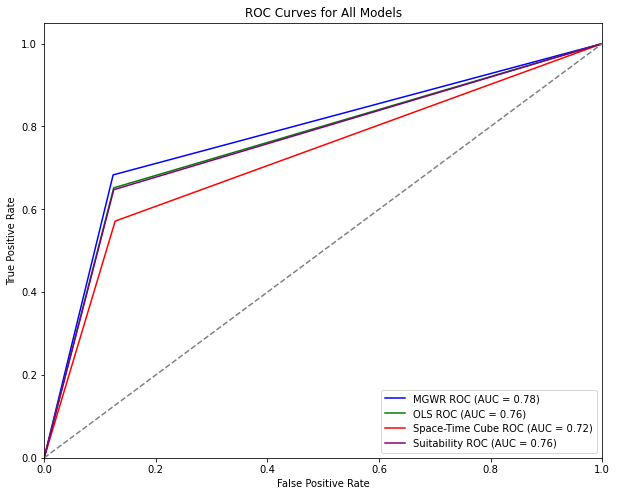

In [45]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Function to compute ROC and AUC
def compute_roc(y_true, y_pred_labels):
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_true, y_pred_labels)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

# Sort by predicted values and assign T=1 to top 246, F=0 to the rest
gdf1 = gdf1.sort_values(by='S_CONVENIE_norm', ascending=False)
gdf2 = gdf2.sort_values(by='Estimated_norm', ascending=False)
gdf3 = gdf3.sort_values(by='Score_norm', ascending=False)
gdf4 = gdf4.sort_values(by='score_norm', ascending=False)

# Mark the top 2000 as T=1, and the rest as F=0
gdf1['Pred_TF'] = [1 if i < 1000 else 0 for i in range(len(gdf1))]
gdf2['Pred_TF'] = [1 if i < 1000 else 0 for i in range(len(gdf2))]
gdf3['Pred_TF'] = [1 if i < 1000 else 0 for i in range(len(gdf3))]
gdf4['Pred_TF'] = [1 if i < 1000 else 0 for i in range(len(gdf4))]

# Calculate ROC and AUC for each model
fpr_gdf1, tpr_gdf1, auc_gdf1 = compute_roc(gdf1['Y'], gdf1['Pred_TF'])
fpr_gdf2, tpr_gdf2, auc_gdf2 = compute_roc(gdf2['Y'], gdf2['Pred_TF'])
fpr_gdf3, tpr_gdf3, auc_gdf3 = compute_roc(gdf3['Y'], gdf3['Pred_TF'])
fpr_gdf4, tpr_gdf4, auc_gdf4 = compute_roc(gdf4['Y'], gdf4['Pred_TF'])

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_gdf1, tpr_gdf1, color='blue', label=f'MGWR ROC (AUC = {auc_gdf1:.2f})')
plt.plot(fpr_gdf2, tpr_gdf2, color='green', label=f'OLS ROC (AUC = {auc_gdf2:.2f})')
plt.plot(fpr_gdf3, tpr_gdf3, color='red', label=f'Space-Time Cube ROC (AUC = {auc_gdf3:.2f})')
plt.plot(fpr_gdf4, tpr_gdf4, color='purple', label=f'Suitability ROC (AUC = {auc_gdf4:.2f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Add labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc="lower right")

# Show plot
plt.show()


# Result
## Result

The following table presents the error metrics and AUC for the four models:

| Model              | MSE   | RMSE  | MAPE (%) | AUC  |
|--------------------|-------|-------|----------|------|
| **MGWR**            | 0.0399 | 0.1997 | 64.6229  | 0.78 |
| **OLS**             | 0.1522 | 0.3901 | 32.4807  | 0.76 |
| **Space-Time Cube** | 0.0312 | 0.1766 | 81.0470  | 0.72 |
| **Suitability**     | 0.1252 | 0.3539 | 30.0376  | 0.76 |

The table includes:
- **MSE (Mean Squared Error)**
- **RMSE (Root Mean Squared Error)**
- **MAPE (Mean Absolute Percentage Error)**
- **AUC (Area Under the Curve)** for the ROC curve.
